### Introduction
This project analyzes the effect of a minimum wage increase on employment using the Difference-in-Differences (DiD) approach to control for bias. The analysis is supported by three regression models and visualizations.

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# EDA 
dataset = pd.read_csv('njmin3.csv')
dataset.describe()
pd.set_option('display.max_columns', None)

# Check missing values
dataset.isnull().any()

#replacing NAs with averages
from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.nan,
                              strategy = 'mean')
missingvalues = missingvalues.fit(dataset[['fte', 'demp']])
dataset[['fte', 'demp']] = missingvalues.transform(dataset[['fte', 'demp']])

#check again
dataset.isnull().any()

NJ                 False
POST_APRIL92       False
NJ_POST_APRIL92    False
fte                False
bk                 False
kfc                False
roys               False
wendys             False
co_owned           False
centralj           False
southj             False
pa1                False
pa2                False
demp               False
dtype: bool

In [2]:
dataset.columns

Index(['NJ', 'POST_APRIL92', 'NJ_POST_APRIL92', 'fte', 'bk', 'kfc', 'roys',
       'wendys', 'co_owned', 'centralj', 'southj', 'pa1', 'pa2', 'demp'],
      dtype='object')

In [3]:
# Define the X and yield
X = dataset[['NJ', 'POST_APRIL92', 'NJ_POST_APRIL92']]
y = dataset['fte']
X.head(5)


,NJ,POST_APRIL92,NJ_POST_APRIL92
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
# Adding a constant 
# It represents the intercept term (also called the constant or bias term) in the regression model.
X1 = sm.add_constant(X)
X1.head()

,const,NJ,POST_APRIL92,NJ_POST_APRIL92
0,1.0,1,0,0
1,1.0,1,0,0
2,1.0,1,0,0
3,1.0,1,0,0
4,1.0,1,0,0


#### Model1

In [ ]:
model1 = sm.OLS(y, X1).fit()
result1 = model1.summary(yname = "FTE",
               xname = ("intercept", "New Jersey", "After April 1992", "New Jersey and after April 1992"))
print(result1)

                            OLS Regression Results                            
Dep. Variable:                    FTE   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.974
Date:                Sun, 20 Apr 2025   Prob (F-statistic):              0.116
Time:                        11:11:06   Log-Likelihood:                -2986.2
No. Observations:                 820   AIC:                             5980.
Df Residuals:                     816   BIC:                             5999.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept 

### Data Visualizaiton

In [ ]:
# Extracting coefficents
intercept, nj_coef, post_april92_coef, nj_post_april92_coef = model1.params
model1.params

const              23.272823
NJ                 -2.815678
POST_APRIL92       -2.110759
NJ_POST_APRIL92     2.681010
dtype: float64

In [7]:
# Calculate the FTE for each group 
pre_pa = intercept
post_pa = intercept + post_april92_coef
pre_nj = intercept + nj_coef   
post_nj = intercept + nj_coef + post_april92_coef + nj_post_april92_coef
counterfactual = intercept + nj_coef + post_april92_coef

[]

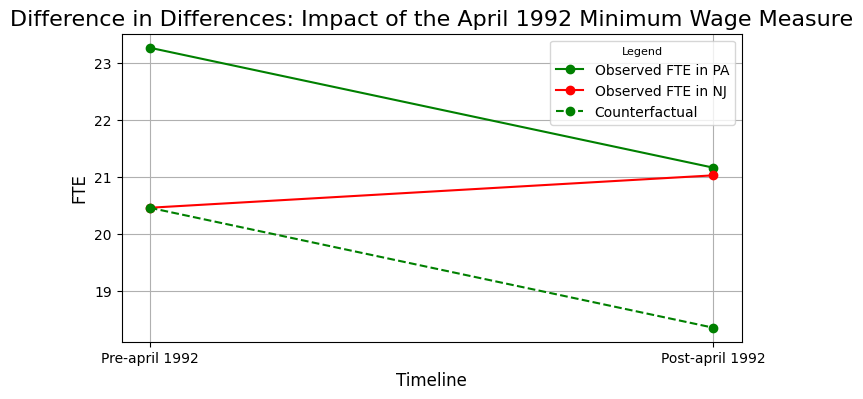

In [15]:
# visualization
plt.figure(figsize=(8,4))
time = ['Pre-april 1992', 'Post-april 1992']

plt.plot(time, [pre_pa, post_pa],
         marker = 'o', linestyle = '-', color = 'green', label = 'Observed FTE in PA')

plt.plot(time, [pre_nj, post_nj], 
         marker ='o', linestyle = '-', color = 'red', label = "Observed FTE in NJ")

plt.plot(time, [pre_nj, counterfactual], 
         marker='o', linestyle = '--', color = 'green', label = "Counterfactual")

plt.title("Difference in Differences: Impact of the April 1992 Minimum Wage Measure", 
          fontsize  =16)
plt.xlabel("Timeline", fontsize = 12)
plt.ylabel("FTE", fontsize = 12)
plt.legend(loc = "upper right", title = "Legend", fontsize = 10, frameon = True, title_fontsize = 8, bbox_to_anchor = (1,1))

plt.grid(True)
plt.plot()

           

#### Model2

In [ ]:
# Choose variables
X = dataset.loc[:, ['NJ', 'POST_APRIL92', 'NJ_POST_APRIL92',
                'bk', 'kfc', 'wendys']].values
Y = dataset['fte']

#creating the second model
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()
result2 = model2.summary(yname = "FTE",
               xname = ("intercept", "New Jersey", "After April 1992",
                        "New Jersey and after April 1992",
                        "Burger King", "KFC", "Wendy's"))
print(result2)

                            OLS Regression Results                            
Dep. Variable:                    FTE   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     31.95
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           1.30e-34
Time:                        11:10:29   Log-Likelihood:                -2902.4
No. Observations:                 820   AIC:                             5819.
Df Residuals:                     813   BIC:                             5852.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept 

#### Model3

In [ ]:
# Choose variables
X = dataset.loc[:, ['NJ', 'POST_APRIL92', 'NJ_POST_APRIL92',
                'bk', 'kfc', 'wendys',
                'co_owned', 'centralj', 'southj']].values

#creating the third model
import statsmodels.api as sm
X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()
result3 = model3.summary(yname = "FTE",
               xname = ("intercept", "New Jersey", "After April 1992",
                        "New Jersey and after April 1992",
                        "Burger King", "KFC", "Wendy's",
                        "Co-owned", "Central J", "South J"))
print(result3)

                            OLS Regression Results                            
Dep. Variable:                    FTE   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     24.89
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           6.45e-38
Time:                        11:11:34   Log-Likelihood:                -2889.1
No. Observations:                 820   AIC:                             5798.
Df Residuals:                     810   BIC:                             5845.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept 

#### Summary 
1. Three regression models were built using different sets of variables.  
2. The treatment effect of the minimum wage increase is associated with higher employment.  
3. The coefficient of `NJ_POST_APRIL92` remains highly stable across model specifications, though its p-value shows some variability.  
4. This project acknowledges resources from Udemy and *The Elements of Statistical Learning*.